# Study Image

In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set_palette("pastel")

In [2]:
# create dummy dataset
data = pd.DataFrame([[0.6, 0.6, 1],
                     [1, 0.6, 0.4]],
                     columns = ['GCT', 'Bridging', 'Local'],
                     index = ['Predictable', 'Unpredictable'])

data.head()

,GCT,Bridging,Local
Predictable,0.6,0.6,1.0
Unpredictable,1.0,0.6,0.4


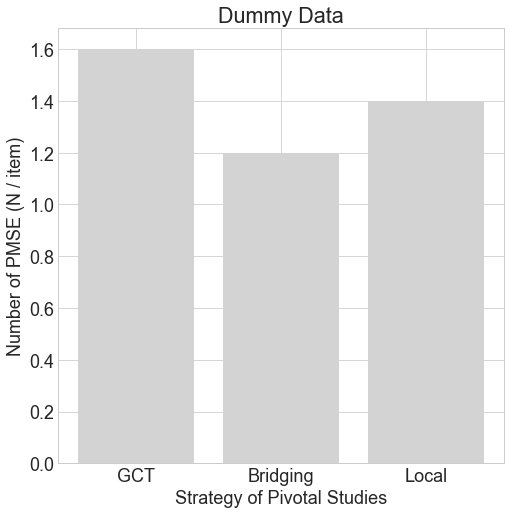

In [13]:
# images of analysis
plt.figure(figsize = (8, 8))
plt.rcParams["font.size"] = 18

_ = plt.bar(data.columns,
            data.sum(),
            color = 'lightgray')
_ = plt.xlabel('Strategy of Pivotal Studies')
_ = plt.ylabel('Number of PMSE (N / item)')
_ = plt.title('Dummy Data')


plt.show();

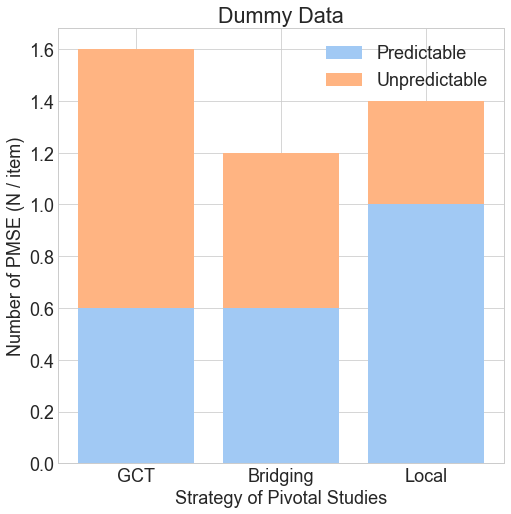

In [4]:
# images of analysis
plt.figure(figsize = (8, 8))
plt.rcParams["font.size"] = 18

for i in range(len(data)) :
    _ = plt.bar(data.columns,
                data.iloc[i],
                bottom = data.iloc[:i].sum())

_ = plt.xlabel('Strategy of Pivotal Studies')
_ = plt.ylabel('Number of PMSE (N / item)')
_ = plt.title('Dummy Data')
plt.legend(data.index)

plt.show();

In [5]:
# normalize the dataset
norm_data = pd.DataFrame(index = data.index)
for col in data.columns:
    norm_data[col] = round(100 * data[col] / data[col].sum(), 1)

norm_data.head()

,GCT,Bridging,Local
Predictable,37.5,50.0,71.4
Unpredictable,62.5,50.0,28.6


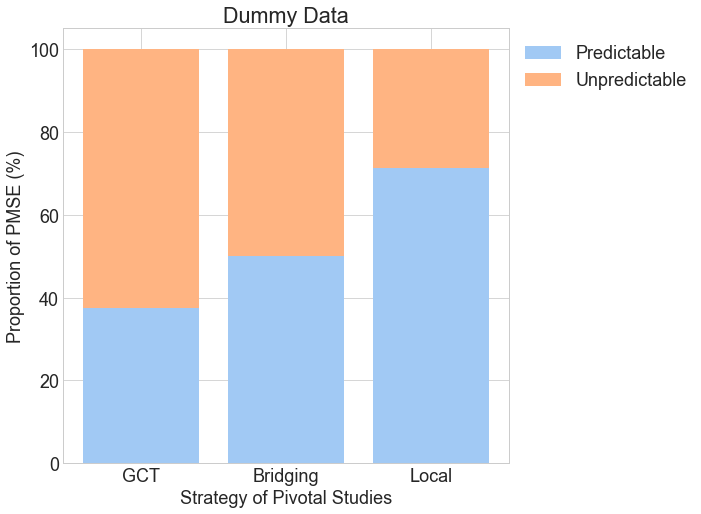

In [6]:
# images of analysis
plt.figure(figsize = (8, 8))
plt.rcParams["font.size"] = 18

for i in range(len(norm_data)) :
    _ = plt.bar(norm_data.columns,
                norm_data.iloc[i],
                bottom = norm_data.iloc[:i].sum())

_ = plt.xlabel('Strategy of Pivotal Studies')
_ = plt.ylabel('Proportion of PMSE (%)')
_ = plt.title('Dummy Data')
plt.legend(norm_data.index,
           loc = 'upper left',
           bbox_to_anchor = (1, 1))

plt.show();

# Pilot Study's Results

In [7]:
# import dataset
ps = pd.read_csv('calculate_ps.csv')
ps.head()

,Drug_id,GCT,Lag_log,Pr_JS_binom,Orphan,FIC,Post_2014,Event,TimetoEvent,Country_EU,Country_JP,Country_US,ATC_J,ATC_L,ATC_others
0,0,0,0.733714,0,0,1,1,0,4.441096,0,0,1,0,0,1
1,1,0,0.263782,1,0,0,1,0,4.202740,0,0,1,0,0,1
2,2,0,0.000000,1,0,1,1,0,4.202740,0,1,0,0,0,1
3,3,0,1.080666,0,0,1,1,0,4.202740,1,0,0,0,0,1
4,5,0,1.253418,1,0,0,1,0,4.202740,0,0,1,0,0,1


In [8]:
# create a crosstab of GCT and PMSE
ct = pd.crosstab(ps.Event, ps.GCT)
ct

GCT,0,1
Event,,
0,65,19
1,63,22


In [9]:
# create bar_data
ct_bar = pd.DataFrame([[100 * 22/41, 100 * 63/128],
                       [100 * 19/41, 100 * 65/128]],
                      columns = ['GCT', 'Others'],
                      index = ['PMSE', 'non-PMSE'])

ct_bar.head()

,GCT,Others
PMSE,53.658537,49.21875
non-PMSE,46.341463,50.78125


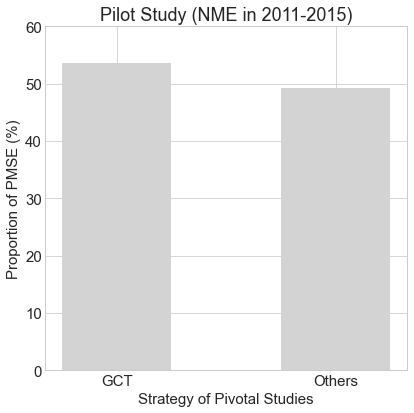

In [14]:
# 
plt.figure(figsize = (6, 6))
plt.rcParams["font.size"] = 15

_ = plt.bar(ct_bar[:1].columns,
            ct_bar[:1].sum(),
            width = 0.5,
            color = 'lightgray')
_ = plt.xlabel('Strategy of Pivotal Studies')
_ = plt.ylabel('Proportion of PMSE (%)')
_ = plt.yticks([0, 10, 20, 30, 40, 50, 60])
_ = plt.title('Pilot Study (NME in 2011-2015)')

plt.tight_layout()
plt.show();